# **Классификация с помощью логистической регрессии**

**Выполнил студент ФИО**

# 1.Выберете набор данных для Классификации

Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений.

* Import библиотек

In [53]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
# но в исполнении scikit-learn
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scikit-learn
from sklearn import preprocessing as prep  # общий модуль предварительной обработки scikit-learn
from sklearn import set_config # для доп настроек

from sklearn.pipeline import Pipeline # Pipeline - суперпомощник автоматизации обработки данных
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn


from sklearn.metrics import r2_score, f1_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn
from sklearn.preprocessing import PolynomialFeatures # Объект для генерации полиномиальных признаков от scikit-learn

RANDOM_STATE = 42
import warnings
warnings.filterwarnings('ignore')

* Загрузка и считывание датасета

Ссылка на датасет - https://www.kaggle.com/datasets/alexandrududa/cars-moldova

In [54]:
df = pd.read_csv("mushroom.csv", delimiter = ',')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [55]:
df.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [56]:
df = df.dropna(subset='gill-attachment')
df = df.drop(['spore-print-color', 'veil-color','veil-type', 'stem-root', 'stem-surface'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51185 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 51185 non-null  object 
 1   cap-diameter          51185 non-null  float64
 2   cap-shape             51185 non-null  object 
 3   cap-surface           38830 non-null  object 
 4   cap-color             51185 non-null  object 
 5   does-bruise-or-bleed  51185 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          31064 non-null  object 
 8   gill-color            51185 non-null  object 
 9   stem-height           51185 non-null  float64
 10  stem-width            51185 non-null  float64
 11  stem-color            51185 non-null  object 
 12  has-ring              51185 non-null  object 
 13  ring-type             49067 non-null  object 
 14  habitat               51185 non-null  object 
 15  season                51

In [57]:
df['cap-surface'].fillna(method='ffill', inplace=True)
df['gill-spacing'].fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51185 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 51185 non-null  object 
 1   cap-diameter          51185 non-null  float64
 2   cap-shape             51185 non-null  object 
 3   cap-surface           51185 non-null  object 
 4   cap-color             51185 non-null  object 
 5   does-bruise-or-bleed  51185 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          49773 non-null  object 
 8   gill-color            51185 non-null  object 
 9   stem-height           51185 non-null  float64
 10  stem-width            51185 non-null  float64
 11  stem-color            51185 non-null  object 
 12  has-ring              51185 non-null  object 
 13  ring-type             49067 non-null  object 
 14  habitat               51185 non-null  object 
 15  season                51

In [58]:
df = df.dropna(subset=['gill-spacing', 'ring-type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47655 entries, 2118 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 47655 non-null  object 
 1   cap-diameter          47655 non-null  float64
 2   cap-shape             47655 non-null  object 
 3   cap-surface           47655 non-null  object 
 4   cap-color             47655 non-null  object 
 5   does-bruise-or-bleed  47655 non-null  object 
 6   gill-attachment       47655 non-null  object 
 7   gill-spacing          47655 non-null  object 
 8   gill-color            47655 non-null  object 
 9   stem-height           47655 non-null  float64
 10  stem-width            47655 non-null  float64
 11  stem-color            47655 non-null  object 
 12  has-ring              47655 non-null  object 
 13  ring-type             47655 non-null  object 
 14  habitat               47655 non-null  object 
 15  season               

In [59]:
df = df.drop_duplicates() # удаляем дубликаты
df = df.reset_index(drop=True) # обновим индексы
df.duplicated().sum()

0

## 2. Выполните исследовательский анализ данных.

Оцените связь Признаков с целевой переменной (агрегация с помощью метода groupby библиотеки Pandas).

In [60]:
# делим признаки на котегориальные и числовые

cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'] 
 Число столблцов =  13
Числовые данные:	  ['cap-diameter', 'stem-height', 'stem-width'] 
 Число столблцов =  3


Удалим зависимые параметры, Age более информативный, поэтому его сгенерируем, а Year удалим.

Сразу изменим список числовых признаков.

In [61]:
df[cat_columns].nunique()

class                    2
cap-shape                7
cap-surface             11
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-spacing             3
gill-color              12
stem-color              13
has-ring                 2
ring-type                6
habitat                  8
season                   4
dtype: int64

Выбираем переменную Transmission как целевую.

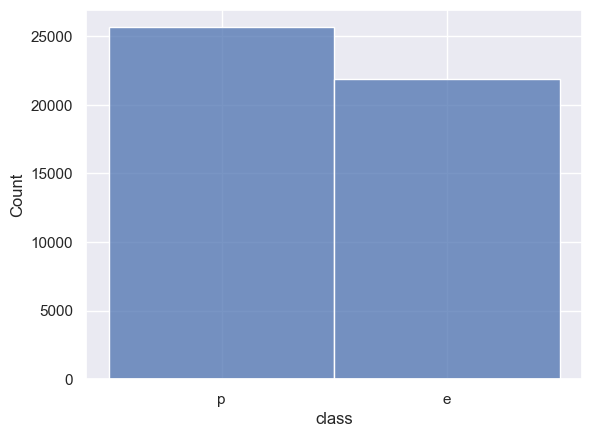

In [62]:
# Посмотрим как выглядит распределение целевой переменной.
target = "class"
sns.histplot(
    df,
    x=target
)

classification_df=df.copy()

In [63]:
# Группировка по признакам и расчет количества значений целевой переменной
classification_df.groupby('class').count()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
class,,,,,,,,,,,,,,,
e,21886,21886,21886,21886,21886,21886,21886,21886,21886,21886,21886,21886,21886,21886,21886
p,25652,25652,25652,25652,25652,25652,25652,25652,25652,25652,25652,25652,25652,25652,25652


<Figure size 1000x1000 with 0 Axes>

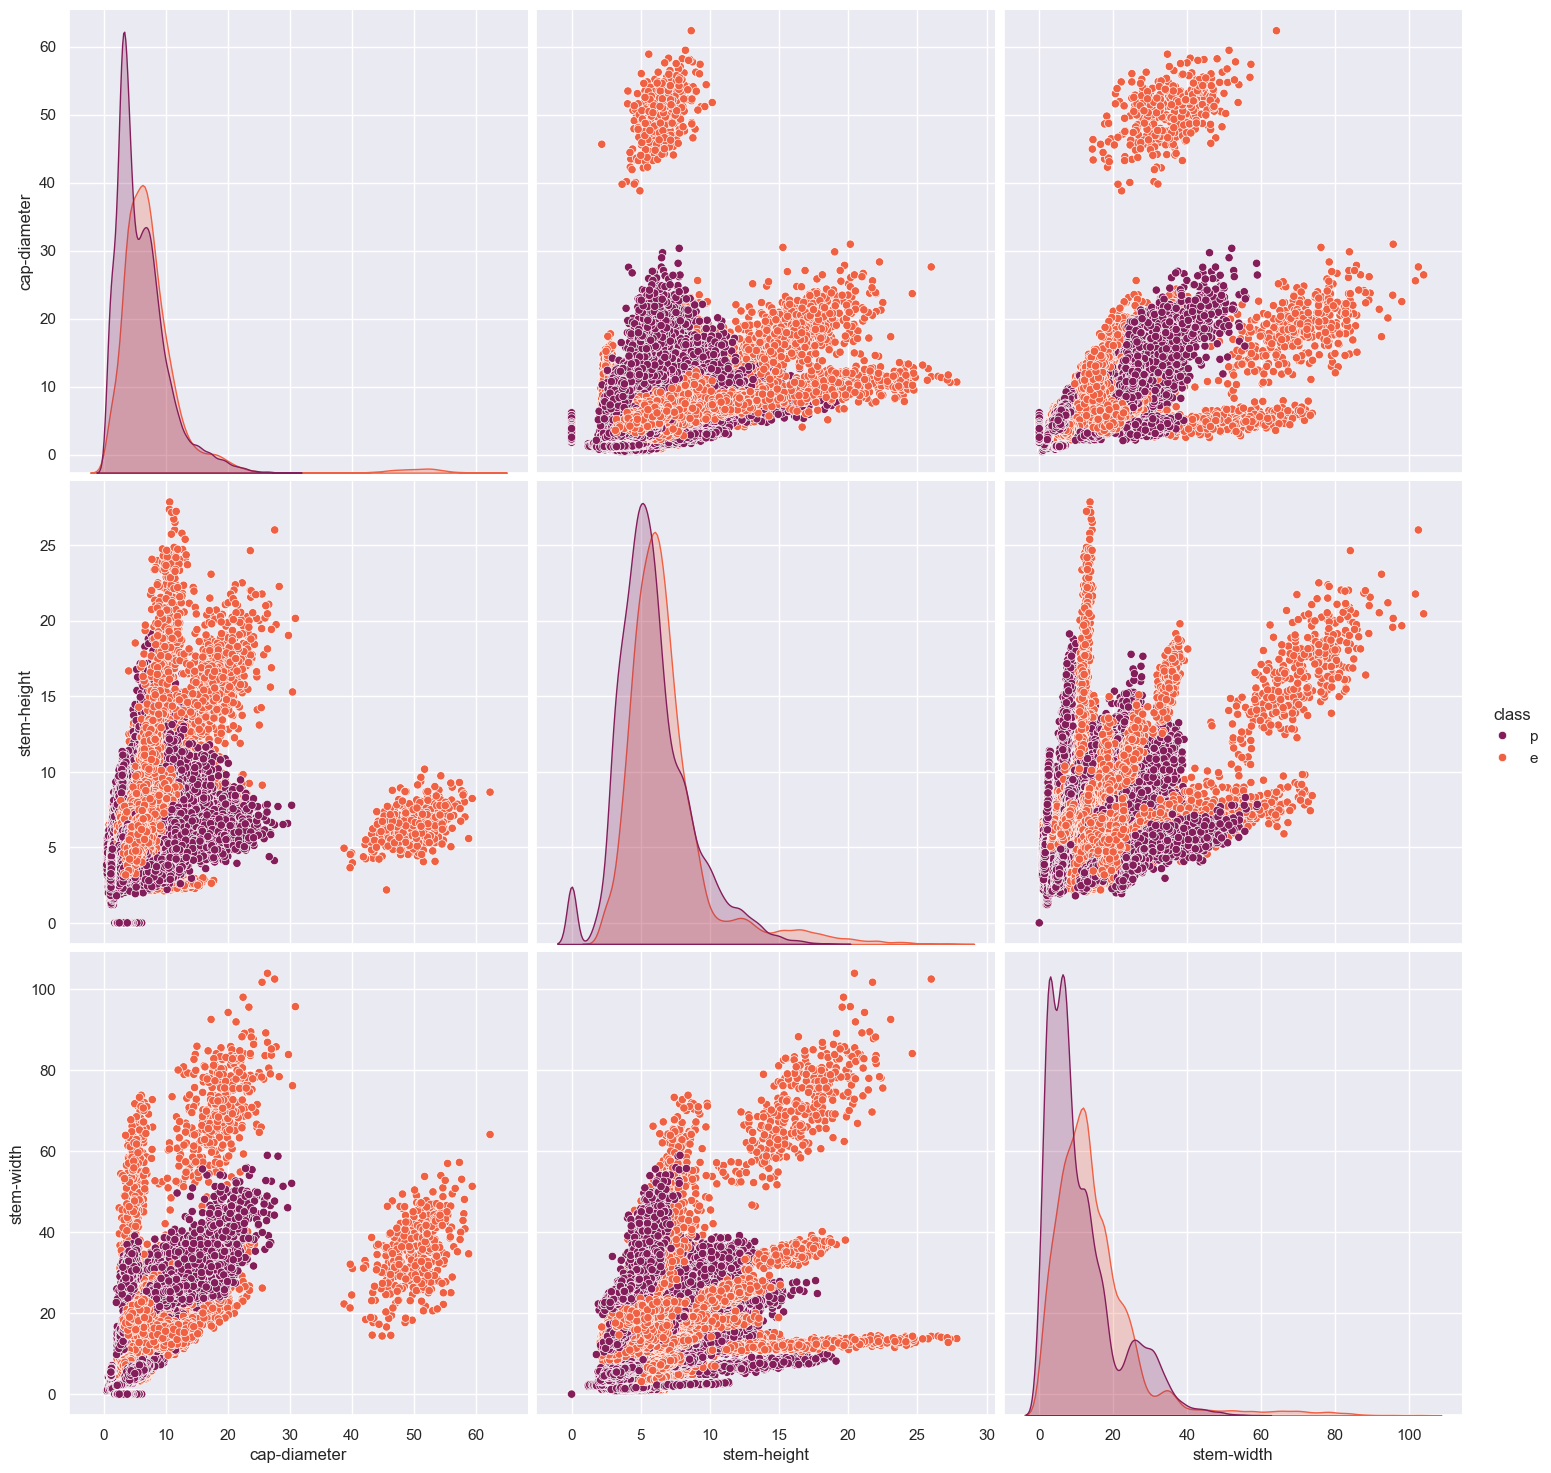

In [65]:
# визуализируем распределение целевой переменной по отношению к числовым признакам
fig = plt.figure(figsize=(10, 10))
sns.pairplot(data = classification_df[['cap-diameter', 'stem-height', 'stem-width', 'class']],
              hue ='class',
              palette = 'rocket',
              height=5);

Целевая переменная "Manual" преобладает в признаках. Исключение "Price(Euro) - тут преобладает "Automatic".

# 3.Выполните адекватную предварительную обработку данных

Выполните адекватную предварительную обработку данных разными методами. Разные методы означают стандартизацию, нормализацию и степенное преобразование для числовых признаков и порядковое/one-hot кодирование для категориальных.



* Разделим датасет на признаки и целевые метки

Для задачи классификации выделим признак 'Transmission' в отдельный целевой датасет. Остальные признаки будут данными для тренировки модели.

In [66]:
data = df.drop(columns = ['class']) # признаках не нужен 'class' - удаляем
target = df['class'] # поскольку это целевая метка

Сразу скорректируем список категориальных признаков

In [67]:
cat_columns.remove('class') # уберем Целевую метку из списка категориальных данных


In [68]:
cat_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

Приводим целевые метки к 0 и 1 (0 это 'Automatic', а 1 это 'Manual')



In [69]:
Label = prep.LabelEncoder()
Label.fit(target) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"
Label_encoded = Label.transform(target) # преобразуем и сохраняем в новую переменную
Label_encoded

array([1, 1, 1, ..., 1, 1, 1])

Разбиваем на тестовую и тренировочную выборку.

In [71]:
X_train, X_val, y_train, y_val = train_test_split(data,Label_encoded,
                                                  test_size = 0.2,
                                                  random_state = RANDOM_STATE)

* Выполним нормализацию и порядковое/one-hot кодирование.

* Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате:
строка- название (даем имя Объекту)
сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных

In [72]:
# Pipeline предобработки числовых данных - нормализация
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),

    ('scaler', MinMaxScaler())

])

In [73]:
numerical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

Теперь для категориальных

In [74]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

In [75]:
categorical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

* Объединяем в единый Трансформер Колонок Данных

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате:

* строка - название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [76]:
preprocessors = ColumnTransformer(transformers=[ # передадим пайплайны для объединения в один процесс
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

In [77]:
preprocessors

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cap-diameter', 'stem-height', 'stem-width']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'does-bruise-or-bleed', 'gill-attachment',
                                  'gill-spacing', 'gill-color', 'stem-color',
                                  'has-ring', 'ring-type', 'habitat',
                                  'season'])])

# 4.Разделите данные на тренировочную и валидационную выборку.

Разделите данные на тренировочную и валидационную выборку. Определитесь с метриками, по которым вы будете оценивать модель. Учитывайте дисперсию целевой переменной.

Данные на тренировочные и валидационные мы уже разбили. Определимся с метриками.

Создаем функции метрик для оценки модели.

In [78]:
def accuracy(model_pipe, X, y):
  y_model = model_pipe.predict(X)
  return accuracy_score(y, y_model)

def recall(model_pipe, X, y):
  y_model = model_pipe.predict(X)
  return recall_score(y, y_model)

Обучаем стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся по именам. Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [79]:
preprocessors.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cap-diameter', 'stem-height', 'stem-width']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'does-bruise-or-bleed', 'gill-attachment',
                                  'gill-spacing', 'gill-color', 'stem-color',
                                  'has-ring', 'ring-type', 'habitat',
                                  'season'])])

* Проверим, что трансформер колонок работает.

Чисто в тестовых и ознакомительных целях посмотрим на датасет после преобразования.

In [80]:
cat_ohe_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_columns)
cat_ohe_names

array(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o',
       'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d',
       'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i',
       'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t',
       'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e',
       'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n',
       'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_t',
       'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s',
       'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f',
       'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'ste

Выполняем преобразование тренировочных данных.


In [81]:
train_data = preprocessors.transform(X_train) # преобразуем данные
columns = np.append(num_columns, cat_ohe_names) # объединяем названия колонок
pd.DataFrame(train_data, columns=columns,) #смотрим на датафрейм

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.055118,0.157271,0.060244,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.236392,0.091203,0.135502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.045190,0.293357,0.038014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.049641,0.182406,0.031181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.083875,0.266786,0.079107,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38025,0.078398,0.234470,0.062169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38026,0.931017,0.230521,0.309595,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38027,0.074803,0.277917,0.147532,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38028,0.051352,0.141113,0.032047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Аналогично с валидационными.

In [82]:
val_data = preprocessors.transform(X_val)
pd.DataFrame(val_data, columns=columns,)

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.082677,0.181329,0.067751,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.008559,0.121364,0.016649,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.054262,0.376302,0.026080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.271996,0.249192,0.303821,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.034406,0.300539,0.024829,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,0.147723,0.282944,0.179194,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9504,0.194967,0.351167,0.300356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9505,0.072407,0.177020,0.083823,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9506,0.052379,0.300539,0.036666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Посмотрим размерности созданных выборок

In [83]:
# Посмотрим размерности созданных выборок
display(X_train.shape)
display(X_val.shape)
display(y_train.shape)
display(y_val.shape)

(38030, 15)

(9508, 15)

(38030,)

(9508,)

# 5.Выберите модель машинного обучения.

Выберите модель машинного обучения. Это должна быть модель логистической регрессии.

* Классификация Методом Логистической регрессии

In [84]:
pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LogisticRegression(C=0.001, random_state=42))
])

In [85]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color',
                                                   'does-bruise-or-bleed',
                                                   'gill-attachment',
                                                   'gill-spacing', 'gill-color',
                                                   'stem-color', 'has-ring',
                                                   'ring-type', 'habitat',
                                                   'season'])])),
                ('model', LogisticRegression(C=0.001, random_state=42))])

In [86]:
print(f"accuracy на тренировочной выборке: {accuracy(pipe, X_train, y_train):.4f}")
print(f"accuracy на валидационной выборке: {accuracy(pipe, X_val, y_val):.4f}")

accuracy на тренировочной выборке: 0.7671
accuracy на валидационной выборке: 0.7564


In [87]:
print(f"recall на тренировочной выборке: {recall(pipe, X_train, y_train):.4f}")
print(f"recall на валидационной выборке: {recall(pipe, X_val, y_val):.4f}")

recall на тренировочной выборке: 0.8359
recall на валидационной выборке: 0.8275


## Вывод

Исходя из этих данных, можно сделать вывод, что модель неплохо обучилась. Если добавить новые параметры, то точность на валидационной выборке будет лучше.